#  &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                      Image Retrieval: Solution Approach
###                                     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Uddipta Bhattacharjee (MTech, IIT Hyderabad)

This solution targets to retrieve similar images for a supplied image, for the given dataset. The method uses an Autoencoder based approach for the image reconstruction. Instead of a simple autoencoder, a convolutional autoencoder is used for the model.
For the model development purpose, the entire dataset is divided in training and test set using sklearn train-test split.
<br>
The technical libraries that are used for the model are,
<ol>
  
  <li>OpenCV (for processing images)</li>
  
  <li>Sklearn (for train test split)</li>
  <li>Keras wrapper for the model development</li>
  <li>Tensorflow backend</li>
  <li>Matplotlib (for plotting)</li>
</ol>



In [1]:
print(" Importing necessary libraries...")
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Model
from keras.optimizers import RMSprop
import cv2
import glob
import numpy as np
from PIL import Image
import os
print(" Libraries imported.")

 Importing necessary libraries...


Using TensorFlow backend.


 Libraries imported.


### Data Loading and Train-Test split

In [2]:
print(" Loading Images from the dataset...")
filepath='dataset/'
X_data=[]
X_orig_data=[]
files=os.listdir(filepath)
print(" Number of Image files:{}".format(len(files)))
for img in files:
    
    image=cv2.imread (filepath+img,0) #loading image for training
    image1=cv2.imread (filepath+img) #Loading original 512X512 for returning the results
    X_orig_data.append(image1)
    image=cv2.resize(image, (64,64))
    
    X_data.append (image)

#print('X_data shape:', np.array(X_data).shape)
X_data=np.asarray(X_data)
#X_data=np.random.shuffle(X_data)

print(" Dataset loaded.")

 Loading Images from the dataset...
 Number of Image files:4738
 Dataset loaded.


In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Train test split for training with 64X64 images
X_train, X_test, y_train, y_test = train_test_split(X_data, [1]*X_data.shape[0], test_size=0.33, random_state=42)

#This split is for showing original 512X512 images from train test set
train_image,test_image, y_train, y_test = train_test_split(X_orig_data, [1]*X_data.shape[0], test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)


(3174, 64, 64)
(1564, 64, 64)


### Normalization and Image reshaping for model development

In [4]:
X_train=X_train.astype('float32') / 255.
X_test=X_test.astype('float32') / 255.

##### Why reshape to a 64X64 image?
<br>
Training with a higher dimensional image requires higher compute and resources. Due to limited availability of the resources, the current model compresses the image to a 64X64 dimension. A higher dimension, however, can capture more complex patterns!

In [5]:
X_train=np.reshape(X_train, (-1, 64,64, 1))
X_test=np.reshape(X_test, (-1,64,64, 1))

In [6]:
print(X_train.shape,X_test.shape)
print(X_train.dtype, X_test.dtype)


(3174, 64, 64, 1) (1564, 64, 64, 1)
float32 float32


### Model Deelopment

In [7]:
batch_size=128
epochs=50
channel=1
x=64
y=64
inputs=Input(shape = (x, y, channel))

In [8]:
def autoencoder(inputs):
    #encoder portion of the code.
    #Uses convolution filetrs and maxpooling for feature extraction
    x=Conv2D(32,(3,3), activation='relu', padding='same')(inputs)
    x=MaxPooling2D((2,2), padding='same')(x)
    x=Conv2D(8,(3,3), activation='relu', padding='same')(x)
    x=MaxPooling2D((2,2), padding='same')(x)
    x=Conv2D(8,(3,3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

    
    #Decoder portion of the code
    x=Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x=UpSampling2D((2, 2))(x)
    x=Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x=UpSampling2D((2, 2))(x)
    x=Conv2D(32, (3, 3), activation='relu',padding='same')(x)
    x=UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return decoded

In [9]:
autoencoder = Model(inputs, autoencoder(inputs))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [10]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         2312      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 8, 8, 8)           0   

### Model Training

In [11]:
autoencoder_train=autoencoder.fit(X_train,X_train, batch_size=batch_size,epochs=20,verbose=1)


Epoch 1/20
3174/3174 [==============================] - 36s 11ms/step - loss: 0.0447
Epoch 2/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0340
Epoch 3/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0293
Epoch 4/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0276
Epoch 5/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0266
Epoch 6/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0257
Epoch 7/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0250
Epoch 8/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0242
Epoch 9/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0236
Epoch 10/20
3174/3174 [==============================] - 25s 8ms/step - loss: 0.0232
Epoch 11/20
3174/3174 [==============================] - 24s 8ms/step - loss: 0.0226
Epoch 12/20
3174/3174 [==============================] - 25s 8ms/step - 

### Saving the models

In [12]:
autoencoder.save('autoencoder.h5')
#autoencoder.summary()
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)
print(autoencoder.get_layer('encoder').output.shape)
encoder.save('encoder.h5')

(?, 8, 8, 8)


In [13]:
encoder=Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)
print(autoencoder.get_layer('encoder').output.shape)
encoder.save('encoder.h5')

(?, 8, 8, 8)


### Model Testing

Here, the model predicts the output and retieve similar images for two given indices

----------------------------------------------------------


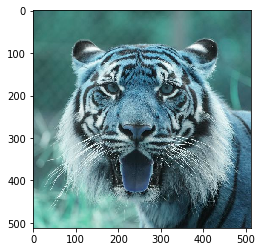

<Figure size 576x576 with 0 Axes>

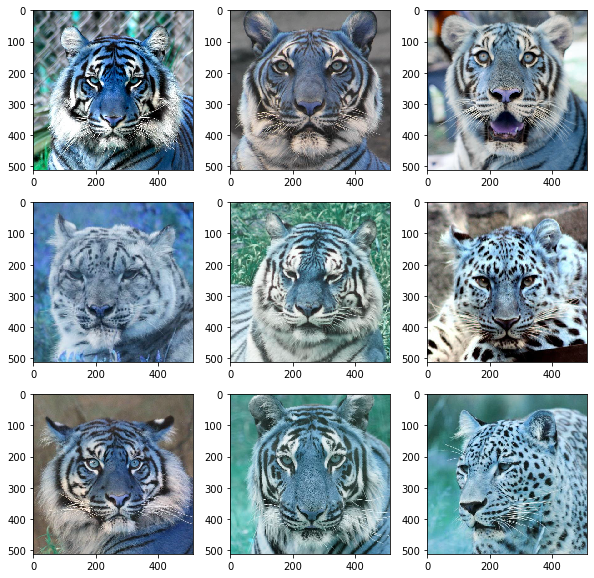

In [15]:
indexes=[4]
for idx in indexes:
    test=X_test[idx]
    code=encoder.predict(X_test)
    query_code = encoder.predict(test.reshape(1,64,64,1))

    from sklearn.neighbors import NearestNeighbors
    n_neigh = 10
    
    #Reshaping the codes to the output of the encoding layer.
    code=code.reshape(-1, 8*8*8)
    query_code=query_code.reshape(1, 8*8*8)
    knn=NearestNeighbors(n_neighbors=n_neigh,metric='cosine').fit(code)
    distances, indices = knn.kneighbors(np.array(query_code))
    #print(indices)

    print("----------------------------------------------------------")
    plt.imshow(test_image[idx])
    idx_list=[]
    fig=plt.figure(figsize=(8, 8))
    row=3
    col=3
    
    for i in indices[0][1:]:
        idx_list.append(i)
        
        
    
    fig=plt.figure(figsize=(10,10))
    columns = 3
    rows = 3
    for i in range(1, columns*rows+1 ):
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(test_image[idx_list[i-1]])
    plt.show()


----------------------------------------------------------


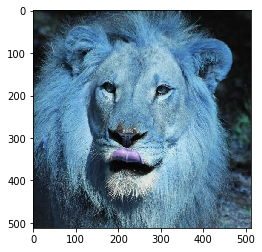

<Figure size 576x576 with 0 Axes>

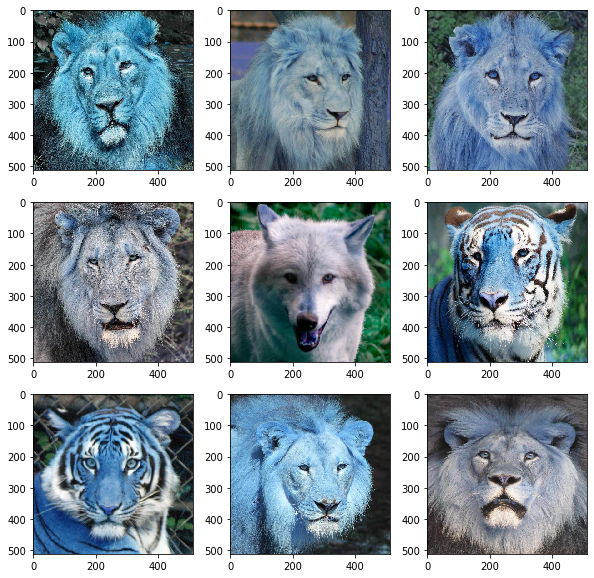

In [16]:
indexes=[8]
for idx in indexes:
    test=X_test[idx]
    code=encoder.predict(X_test)
    query_code = encoder.predict(test.reshape(1,64,64,1))

    from sklearn.neighbors import NearestNeighbors
    n_neigh = 10
    
    #Reshaping the codes to the output of the encoding layer.
    code=code.reshape(-1, 8*8*8)
    query_code=query_code.reshape(1, 8*8*8)
    knn=NearestNeighbors(n_neighbors=n_neigh,metric='cosine').fit(code)
    distances, indices = knn.kneighbors(np.array(query_code))
    #print(indices)

    print("----------------------------------------------------------")
    plt.imshow(test_image[idx])
    idx_list=[]
    fig=plt.figure(figsize=(8, 8))
    row=3
    col=3
    
    for i in indices[0][1:]:
        idx_list.append(i)
        
        
    
    fig=plt.figure(figsize=(10,10))
    columns = 3
    rows = 3
    for i in range(1, columns*rows+1 ):
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(test_image[idx_list[i-1]])
    plt.show()
